In [11]:
import jax 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad

In [7]:
def f(x): 
    Q = jnp.array([[3, 2], [2, 3]])
    x_0 = jnp.array([-1.5, 1])
    return 1/2 * (x - x_0) @ Q @ (x - x_0)



Text(0, 0.5, 'y')

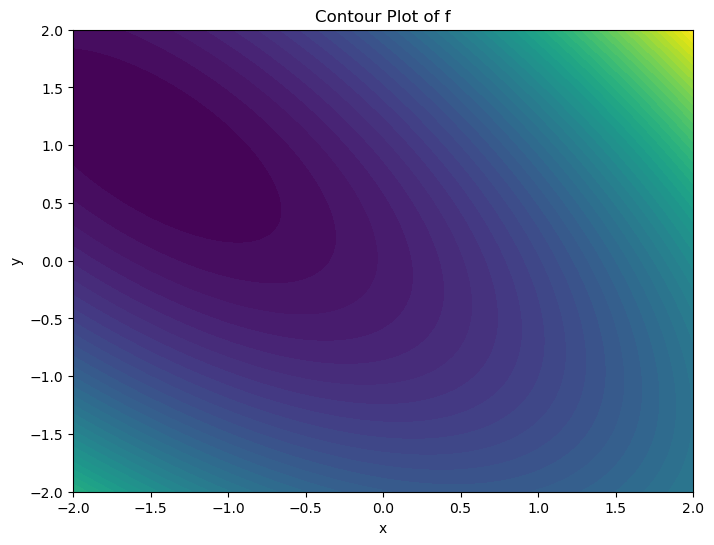

In [16]:
x = jnp.linspace(-2, 2, 100)
y = jnp.linspace(-2, 2, 100)
X, Y = jnp.meshgrid(x, y)  # jax.numpy.meshgrid works like numpy's

# Evaluate f on the grid
f_vectorized = jax.vmap(lambda xy: f(xy))  # Vectorize over points
points = jnp.stack([X.ravel(), Y.ravel()], axis=1)  # Flatten the grid for batching
Z = f_vectorized(points).reshape(X.shape)  # Reshape the result to grid shape

# Plot the contour
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap="viridis")
ax.set_title("Contour Plot of f")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [20]:
def grad_descent_standard(n_steps, x_init, lr, f): 
    trajectory = [x_init]
    grad_f = grad(f) 
    x_current = x_init
    for n in range(n_steps):
        x_new = x_current - lr * grad_f(x_current)
        trajectory.append(x_new)
        x_current = x_new
    return jnp.array(trajectory)

In [48]:
def grad_descent_mirror(n_steps, x_init, lr, f, phi, psi): 
    trajectory = [x_init]
    grad_f = grad(f) 
    x_current = x_init
    for n in range(n_steps):
        x_new = phi(psi(x_current) - lr * grad_f(x_current)) 
        trajectory.append(x_new)
        x_current = x_new
    return jnp.array(trajectory)

In [66]:
n_steps, x_init, lr, = 30, jnp.array([1.5, 1]), .1

t = grad_descent_standard(n_steps, x_init, lr, f)

def softmax(u): 
    return jnp.log(1 + jnp.exp(u))

def softmax_inv(x): 
    return jnp.log(jnp.exp(x) - 1)


t_mirror = grad_descent_mirror(n_steps, x_init, lr, f, jnp.exp, jnp.log) 

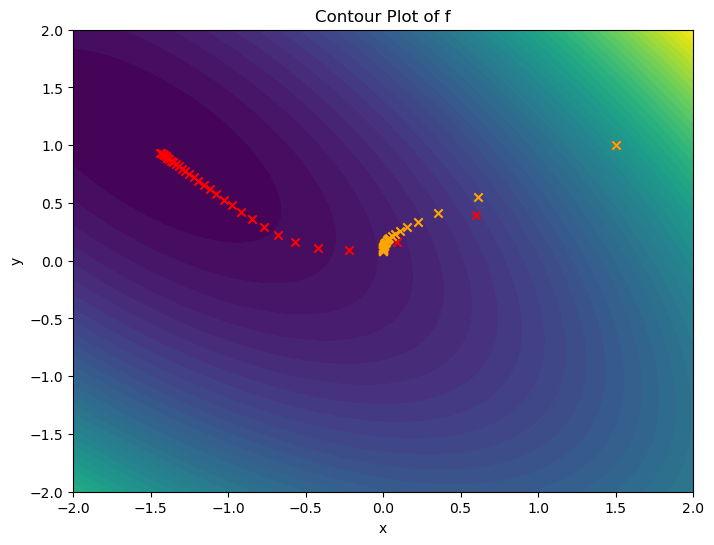

In [68]:
x = jnp.linspace(-2, 2, 100)
y = jnp.linspace(-2, 2, 100)
X, Y = jnp.meshgrid(x, y)  # jax.numpy.meshgrid works like numpy's

# Evaluate f on the grid
f_vectorized = jax.vmap(lambda xy: f(xy))  # Vectorize over points
points = jnp.stack([X.ravel(), Y.ravel()], axis=1)  # Flatten the grid for batching
Z = f_vectorized(points).reshape(X.shape)  # Reshape the result to grid shape

# Plot the contour
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap="viridis")
ax.set_title("Contour Plot of f")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(t[:, 0], t[:, 1], color='red', marker='x')
ax.scatter(t_mirror[:, 0], t_mirror[:, 1], color='orange', marker='x')

In [45]:
f(jnp.array([0, 1]))

Array(3.375, dtype=float32)

In [70]:
t_mirror[-1, :]

Array([9.234113e-05, 8.379199e-02], dtype=float32)